In [1]:
using Plots

In [2]:
using DifferentialEquations

In [34]:
using IterTools

In [222]:
function system_evolution(ds, s, p, t)
    state = s[1]
    lambda = s[2]
    profit = s[3]
    
    if state <= 0 || lambda > 5
        ds[1] = 0.0
        ds[2] = 0.0
        ds[3] = 0.0
    else
        h = 1

        if lambda == init_p
            h = opt_h
        elseif lambda > init_p
            h = 0
        end
                
        delta_lambda = (interest_rate - 1 + 2*state) * lambda
        delta_x = state*(1-state) - h
        change_profit = h * init_p
        
        #println(string("lambda: ", delta_lambda, ", state: ", delta_x))

        
        ds[1] = delta_x
        ds[2] = delta_lambda
        ds[3] = change_profit
    end

    
end

system_evolution (generic function with 1 method)

In [223]:
gr(size=(800,600))


Plots.GRBackend()

In [352]:
function compute_solutions(coord_space=[[init_p, 0.5]], t=(0.0, 10.0); with_plot=false)

    solutions = []
    for coords in coord_space
    
      upper = ODEProblem(system_evolution, coords, t)
      solution = solve(upper, alg_hint=:nonstiff)

      push!(solutions, solution)


    end
    
    if with_plot
        space_plot = plot([init_p], seriestype="hline", color=:black, legend=false, linewidth=2, ylabel="lambda", xlabel="fish population")
        space_plot = plot!([stable_x], seriestype="vline",color=:black, legend=false, linewidth=2)
        xlims!(0.,4.)
        ylims!(0., 4.)
        for solution in solutions
            plot!(solution, vars=(1, 2), linewidth = 2, color=:blue)
            first = solution[1]
            plot!([first[1]], [first[2]], seriestype=:scatter, color=:blue)
        end

        
        display(space_plot)

        lambda_plot = plot(ylabel="lambda", legend=false)
        for solution in solutions
            plot!(solution, vars=(0, 2))

        end

        display(lambda_plot)


        state_plot = plot(ylabel="fish population", label=true)

        for (index, solution) in enumerate(solutions)
            plot!(solution, vars=(0,1), label=string(coord_space[index]))
        end

        display(state_plot)
        
        profit = plot(ylabel="profits")

        for (index, solution) in enumerate(solutions)
            plot!(solution, vars=(0,3), label=string(coord_space[index]))
        end

        display(profit)
    end
    
    return solutions
end


compute_solutions (generic function with 4 methods)

In [356]:
function make_space(v = 1, h = 1; around_x=stable_x, around_y=init_p, step=0.05)
    v_distance = (v - 1) * step
    h_distance = (h - 1) * step
    
    v_space = (around_x - v_distance / 2):step:(around_x + v_distance / 2)
    h_space = (around_y - h_distance / 2):step:(around_y + h_distance / 2)
    
    
    return collect(map(tuple -> [tuple[1], tuple[2], 0], vcat((Iterators.product(v_space, h_space))...)))
end

make_space (generic function with 4 methods)

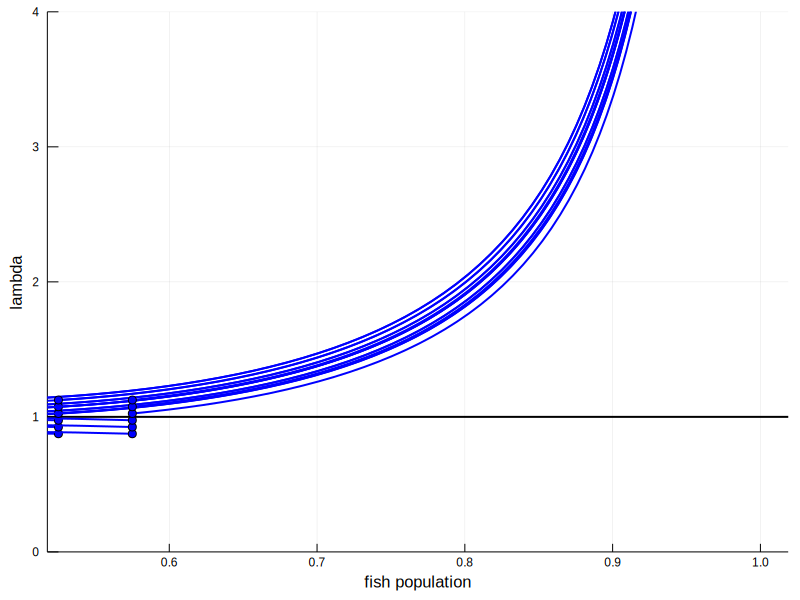

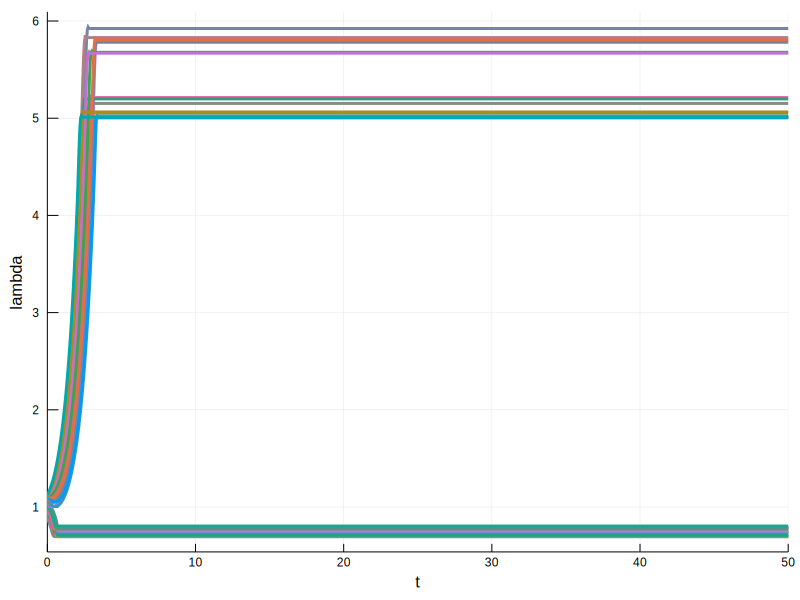

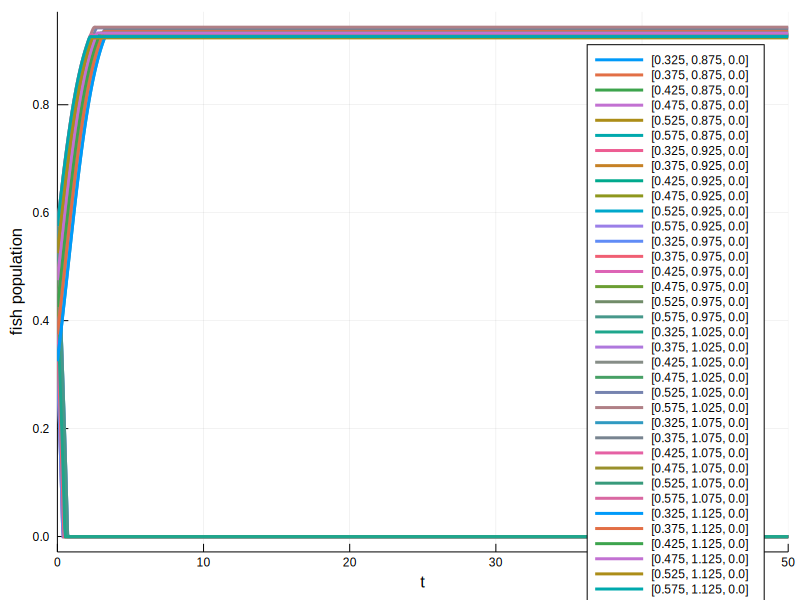

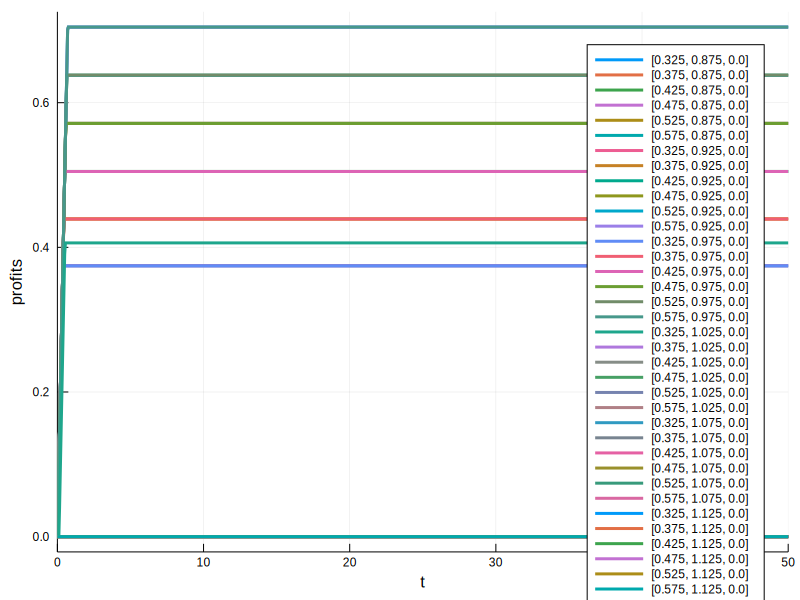

36-element Array{Any,1}:
 retcode: Success
Interpolation: Automatic order switching interpolation
t: [0.0, 0.0014112338908027534, 0.015523572798830288, 0.1327033115493887, 0.3524374791241943, 0.3693959239422206, 0.37339185883307024, 0.37392868420984715, 0.3741961737025923, 0.3745606021789906, 0.3747187215271001, 0.3762999150081949, 0.3921118498191423, 0.550231197928617, 2.131424679023363, 17.943359489970824, 50.0]
u: Array{Float64,1}[[0.325, 0.875, 0.0], [0.32389808285936034, 0.8746899869506757, 0.0014112338908027532], [0.31284816690743084, 0.871446548256244, 0.015523572798830284], [0.21846496753118877, 0.8346838076407616, 0.13270331154938866], [0.021694053743321753, 0.722891420869217, 0.3524374791241942], [0.004958574993644644, 0.7122644064273416, 0.3693959239422205], [0.0009744588991958916, 0.7097242944701383, 0.37339185883307013], [0.0004380123798532791, 0.7093820169878641, 0.37392868420984704], [0.00017060426161455162, 0.7092113759912312, 0.37419617370259217], [-4.306312616329142e-

In [358]:
init_p = 1.
interest_rate = 0.1
opt_h = (1 - interest_rate^2) / 4
stable_x = (1 - interest_rate) /2

stable = make_space(6, 6)

solutions = compute_solutions(stable, (0., 50.), with_plot=true)


In [355]:
stable

25-element Array{Array{Float64,1},1}:
 [-0.04999999999999999, 0.5, 0.0] 
 [0.2, 0.5, 0.0]                  
 [0.45, 0.5, 0.0]                 
 [0.7, 0.5, 0.0]                  
 [0.95, 0.5, 0.0]                 
 [-0.04999999999999999, 0.75, 0.0]
 [0.2, 0.75, 0.0]                 
 [0.45, 0.75, 0.0]                
 [0.7, 0.75, 0.0]                 
 [0.95, 0.75, 0.0]                
 [-0.04999999999999999, 1.0, 0.0] 
 [0.2, 1.0, 0.0]                  
 [0.45, 1.0, 0.0]                 
 [0.7, 1.0, 0.0]                  
 [0.95, 1.0, 0.0]                 
 [-0.04999999999999999, 1.25, 0.0]
 [0.2, 1.25, 0.0]                 
 [0.45, 1.25, 0.0]                
 [0.7, 1.25, 0.0]                 
 [0.95, 1.25, 0.0]                
 [-0.04999999999999999, 1.5, 0.0] 
 [0.2, 1.5, 0.0]                  
 [0.45, 1.5, 0.0]                 
 [0.7, 1.5, 0.0]                  
 [0.95, 1.5, 0.0]                 

In [359]:
stable

36-element Array{Array{Float64,1},1}:
 [0.325, 0.875, 0.0]
 [0.375, 0.875, 0.0]
 [0.425, 0.875, 0.0]
 [0.475, 0.875, 0.0]
 [0.525, 0.875, 0.0]
 [0.575, 0.875, 0.0]
 [0.325, 0.925, 0.0]
 [0.375, 0.925, 0.0]
 [0.425, 0.925, 0.0]
 [0.475, 0.925, 0.0]
 [0.525, 0.925, 0.0]
 [0.575, 0.925, 0.0]
 [0.325, 0.975, 0.0]
 ⋮                  
 [0.325, 1.075, 0.0]
 [0.375, 1.075, 0.0]
 [0.425, 1.075, 0.0]
 [0.475, 1.075, 0.0]
 [0.525, 1.075, 0.0]
 [0.575, 1.075, 0.0]
 [0.325, 1.125, 0.0]
 [0.375, 1.125, 0.0]
 [0.425, 1.125, 0.0]
 [0.475, 1.125, 0.0]
 [0.525, 1.125, 0.0]
 [0.575, 1.125, 0.0]

In [363]:
function gradient(state, lambda)

    if state <= 0 || lambda > 5
        return [v -> 0, v -> 0]
    else
        h = 1

        if lambda == init_p
            h = opt_h
        elseif lambda > init_p
            h = 0
        end
                
        delta_lambda = (interest_rate - 1 + 2*state) * lambda
        delta_x = state*(1-state) - h
        
        #println(string("lambda: ", delta_lambda, ", state: ", delta_x))

        
        return [v -> (interest_rate - 1 + 2*state) * lambda, v -> state*(1-state)-h]
    end

    
end

gradient (generic function with 2 methods)

In [361]:
quiver(stable, quiver=gradient)

MethodError: MethodError: no method matching gradient(::Int64, ::Float64)
Closest candidates are:
  gradient(::Any, ::Any, !Matched::Any) at In[360]:3